In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#Spremanje inputa

vremenski_period = 12
mjesecne_kolicine = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]
trosak_pripreme = 500
trosak_skladistenja = 1
trosak_proizvodnje = 3

In [47]:
#Napraviti listu mjeseci, moguće generirati prema inputu
period = [i for i in range(1,vremenski_period+1)]

#Napraviti popis količine narudžbi, moguće napumiti inputom
forecast = mjesecne_kolicine

#Izrada dicitionaria od kojeg ću napraviti DataFrame
d = {'period': period, 'forecast': forecast}

#Izrada DataFrame-a
data = pd.DataFrame(data=d)

data

,period,forecast
0,1,200
1,2,150
2,3,100
3,4,50
4,5,50
5,6,100
6,7,150
7,8,200
8,9,200
9,10,250


In [48]:
#Izrada nove tablice u kojoj radimo izračun
data_calc = data.copy()

for i in data_calc['period'].unique():
    data_calc['Order {}'.format(i)] = 0

data_calc

,period,forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,0,0,0,0,0,0,0,0,0,0,0,0
1,2,150,0,0,0,0,0,0,0,0,0,0,0,0
2,3,100,0,0,0,0,0,0,0,0,0,0,0,0
3,4,50,0,0,0,0,0,0,0,0,0,0,0,0
4,5,50,0,0,0,0,0,0,0,0,0,0,0,0
5,6,100,0,0,0,0,0,0,0,0,0,0,0,0
6,7,150,0,0,0,0,0,0,0,0,0,0,0,0
7,8,200,0,0,0,0,0,0,0,0,0,0,0,0
8,9,200,0,0,0,0,0,0,0,0,0,0,0,0
9,10,250,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# troskovi
set_up = trosak_pripreme
holding = trosak_skladistenja

# Prva narudzba
order = 1
for index, row in data_calc.iterrows():
    current_month = data_calc.loc[index,'period']
    cost = 0
    # Prva priprema
    cost += set_up
    if current_month > 1:
        for t in range(1, current_month+1):
            cost += (t-1) * data_calc.loc[t-1,'forecast'] * holding
    data_calc.loc[index,'Order {}'.format(order)] = cost

data_calc

,period,forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,500,0,0,0,0,0,0,0,0,0,0,0
1,2,150,650,0,0,0,0,0,0,0,0,0,0,0
2,3,100,850,0,0,0,0,0,0,0,0,0,0,0
3,4,50,1000,0,0,0,0,0,0,0,0,0,0,0
4,5,50,1200,0,0,0,0,0,0,0,0,0,0,0
5,6,100,1700,0,0,0,0,0,0,0,0,0,0,0
6,7,150,2600,0,0,0,0,0,0,0,0,0,0,0
7,8,200,4000,0,0,0,0,0,0,0,0,0,0,0
8,9,200,5600,0,0,0,0,0,0,0,0,0,0,0
9,10,250,7850,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Ostale narudzbe
for order in range(2, vremenski_period+1):
    for index, row in data_calc.iterrows():
        current_month = data_calc.loc[index,'period']
        if current_month >= order:
            cost = 0

            # Najbolja opcija za prvi period
            values = list(data_calc.loc[order-2,['Order {}'.format(i) for i in range(1, order+1)]].values)
            best = min([i for i in values if i >0])

            # Zbrajanje
            cost += best + set_up
            for t in range(order, current_month+1):
                cost += (t-order) * data_calc.loc[t-1,'forecast'] * holding
            data_calc.loc[index,'Order {}'.format(order)] = cost

data_calc

,period,forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,500,0,0,0,0,0,0,0,0,0,0,0
1,2,150,650,1000,0,0,0,0,0,0,0,0,0,0
2,3,100,850,1100,1150,0,0,0,0,0,0,0,0,0
3,4,50,1000,1200,1200,1350,0,0,0,0,0,0,0,0
4,5,50,1200,1350,1300,1400,1500,0,0,0,0,0,0,0
5,6,100,1700,1750,1600,1600,1600,1700,0,0,0,0,0,0
6,7,150,2600,2500,2200,2050,1900,1850,2100,0,0,0,0,0
7,8,200,4000,3700,3200,2850,2500,2250,2300,2350,0,0,0,0
8,9,200,5600,5100,4400,3850,3300,2850,2700,2550,2750,0,0,0
9,10,250,7850,7100,6150,5350,4550,3850,3450,3050,3000,3050,0,0


In [51]:
data_calc = data_calc.set_index('period').drop(['forecast'], axis = 1).T

data_calc

period,1,2,3,4,5,6,7,8,9,10,11,12
Order 1,500,650,850,1000,1200,1700,2600,4000,5600,7850,10850,13600
Order 2,0,1000,1100,1200,1350,1750,2500,3700,5100,7100,9800,12300
Order 3,0,0,1150,1200,1300,1600,2200,3200,4400,6150,8550,10800
Order 4,0,0,0,1350,1400,1600,2050,2850,3850,5350,7450,9450
Order 5,0,0,0,0,1500,1600,1900,2500,3300,4550,6350,8100
Order 6,0,0,0,0,0,1700,1850,2250,2850,3850,5350,6850
Order 7,0,0,0,0,0,0,2100,2300,2700,3450,4650,5900
Order 8,0,0,0,0,0,0,0,2350,2550,3050,3950,4950
Order 9,0,0,0,0,0,0,0,0,2750,3000,3600,4350
Order 10,0,0,0,0,0,0,0,0,0,3050,3350,3850


In [52]:
#BACKWARD

costs, initials, nexts, quantities = [], [], [], []
i = vremenski_period
while i>0:
    # Order s najmanjim troškovima
    initial_step = i
    next_step = data_calc[data_calc[i]>0][i].idxmin()
    cost = data_calc[data_calc[i]>0][i].min()
    # Idući korak
    next_id = int(next_step.replace('Order ',''))
    i = next_id - 1
    # Količina
    quantity = data[data['period'].isin(range(next_id, initial_step+1))]['forecast'].sum()

    costs.append(cost)
    initials.append(initial_step)
    nexts.append(next_id)
    quantities.append(quantity)

df_results = pd.DataFrame({'backward':range(1, len(initials)+1),
                           'initial':initials,
                           'nexts':nexts,
                           'cost':costs,
                           'quantity':quantities}).set_index('backward')
print("Total Cost: {:,}e".format(df_results.cost.sum()))
df_results

Total Cost: 10,200e


,initial,nexts,cost,quantity
backward,,,,
1,12,11,3750,550
2,10,9,3000,450
3,8,6,2250,450
4,5,1,1200,550


In [53]:
#CALCULATION

# Mjesecni trosak skladistenja 
hold_cost = trosak_skladistenja
# Trosak pripreme
setup_cost = trosak_pripreme

# Rezultat
results_final = data.copy()

# Proizvodnja
month_prod = df_results['nexts'].values
prod_dict = dict(zip(month_prod, df_results.quantity.values))

# Values
results_final['production'] = results_final['period'].apply(lambda t: prod_dict[t] if t in month_prod else 0)

# Inventory On Hand
results_final['IOH'] = (results_final['production'] - results_final['forecast']).cumsum()

# Holding Cost
results_final['Holding Cost'] = (results_final['IOH'] * hold_cost)

# Set Up Cost
results_final['Set-Up Costs'] = results_final['production'].apply(lambda t: setup_cost if t > 0 else 0)

# Holding + Set-Up
results_final['Holding + Set-Up'] = results_final[['Holding Cost', 'Set-Up Costs']].sum(axis = 1)

# Ukupno 
results_final['Total Cost'] = (results_final['production'] * trosak_proizvodnje) + results_final['Set-Up Costs'] + results_final['Holding Cost']

results_final

,period,forecast,production,IOH,Holding Cost,Set-Up Costs,Holding + Set-Up,Total Cost
0,1,200,550,350,350,500,850,2500
1,2,150,0,200,200,0,200,200
2,3,100,0,100,100,0,100,100
3,4,50,0,50,50,0,50,50
4,5,50,0,0,0,0,0,0
5,6,100,450,350,350,500,850,2200
6,7,150,0,200,200,0,200,200
7,8,200,0,0,0,0,0,0
8,9,200,450,250,250,500,750,2100
9,10,250,0,0,0,0,0,0


In [54]:
ukupan_trosak = results_final['Total Cost'].sum()

ukupan_trosak

9750

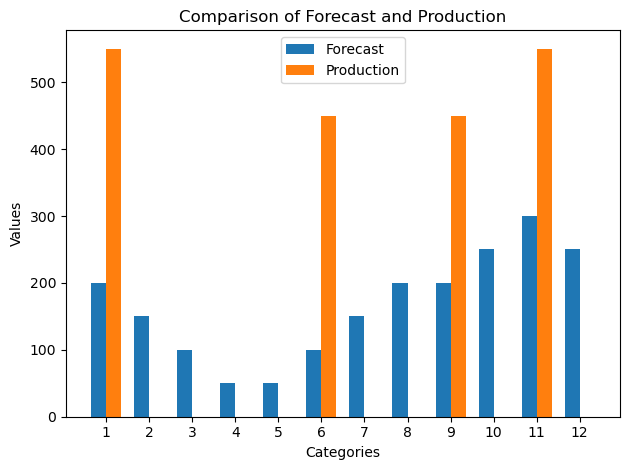

In [66]:
categories = results_final['period']
forecast_values = results_final['forecast']
production_values = results_final['production']

# Number of bars
n = len(categories)

# Set the positions for the bars
x = np.arange(n)

# Bar width (adjust as needed)
width = 0.35

# Create the bars for 'forecast' and 'production' side by side
plt.bar(x - width/2, forecast_values, width, label='Forecast')
plt.bar(x + width/2, production_values, width, label='Production')

# Add labels and title
plt.title('Comparison of Forecast and Production')
plt.xlabel('Categories')
plt.ylabel('Values')

# Set the x-ticks to the middle of the grouped bars
plt.xticks(x, categories)

# Add a legend
plt.legend()

# Adjust layout to ensure labels fit
plt.tight_layout()

# Show the plot
plt.show()


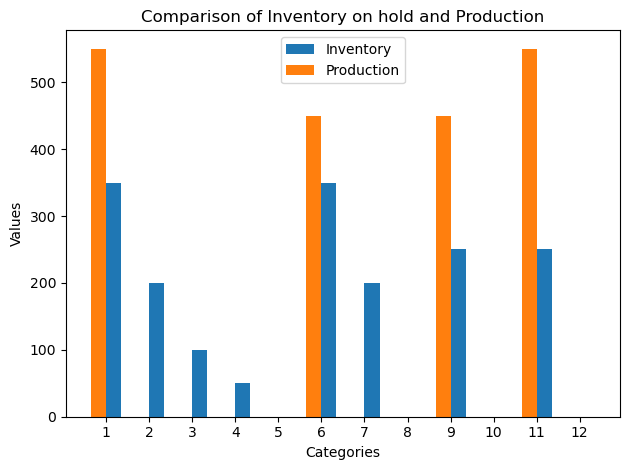

In [65]:

categories = results_final['period']
IOH_values = results_final['IOH']
production_values = results_final['production']

# Number of bars
n = len(categories)

# Set the positions for the bars
x = np.arange(n)

# Bar width (adjust as needed)
width = 0.35

# Create the bars for 'IOH' and 'production' side by side
plt.bar(x + width/2, IOH_values, width, label='Inventory')
plt.bar(x - width/2, production_values, width, label='Production')

# Add labels and title
plt.title('Comparison of Inventory on hold and Production')
plt.xlabel('Categories')
plt.ylabel('Values')

# Set the x-ticks to the middle of the grouped bars
plt.xticks(x, categories)

# Add a legend
plt.legend()

# Adjust layout to ensure labels fit
plt.tight_layout()

# Show the plot
plt.show()


In [57]:
#Izračum ukupnih troškova tjekom odabranog perioda



# Standardni troskovi: tu sam racunao samo troskove pripreme (bez troskova skladistenja)

s = [0] * vremenski_period
s[0]=set_up

for i in range(1,vremenski_period):
      s[i] = (s[i-1]+set_up)
      
ss = [i * trosak_proizvodnje for i in results_final['forecast'].tolist()]

for i in range(1,vremenski_period):
      ss[i] = (ss[i] + ss[i-1])

standardni_troskovi = np.add(s,ss).tolist()


#Optimalni troskovi

optimalni_troskovi = results_final['Total Cost'].tolist()

t = [0] * vremenski_period
t[0] = optimalni_troskovi[0]

for i in range(0,vremenski_period):
    t[i] = t[i-1]+optimalni_troskovi[i]

optimalni_troskovi = t

# Mjesecna usteda

cost_saving = np.subtract(standardni_troskovi, optimalni_troskovi).tolist()

# Izrada tablice

usporedba_troskova = {'standardni troskovi': standardni_troskovi, 'optimalni troskovi': optimalni_troskovi, 'mjesecna usteda': cost_saving}

usporedba_troskova_df = pd.DataFrame(data=usporedba_troskova)

usporedba_troskova_df.index = range(1, len(usporedba_troskova_df)+1)

usporedba_troskova_df


,standardni troskovi,optimalni troskovi,mjesecna usteda
1,1100,2500,-1400
2,2050,2700,-650
3,2850,2800,50
4,3500,2850,650
5,4150,2850,1300
6,4950,5050,-100
7,5900,5250,650
8,7000,5250,1750
9,8100,7350,750
10,9350,7350,2000


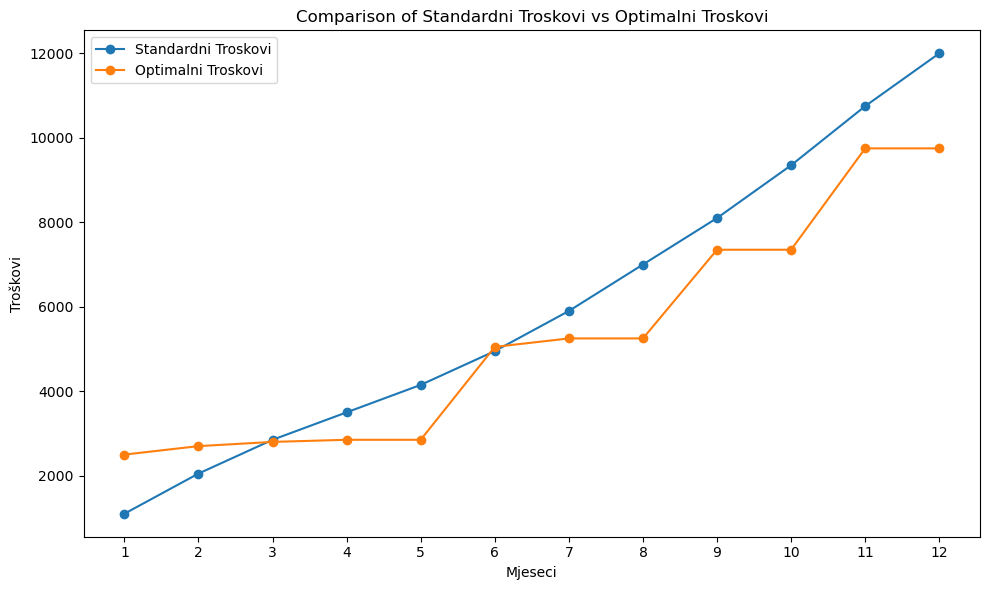

In [68]:

# Create month labels based on the index of the DataFrame
months = [str(i) for i in usporedba_troskova_df.index]

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plot 'standardni_troskovi' and 'optimalni_troskovi'
plt.plot(usporedba_troskova_df.index, usporedba_troskova_df['standardni troskovi'], label='Standardni Troskovi', marker='o')
plt.plot(usporedba_troskova_df.index, usporedba_troskova_df['optimalni troskovi'], label='Optimalni Troskovi', marker='o')

# Adding labels and title
plt.title('Comparison of Standardni Troskovi vs Optimalni Troskovi')
plt.xlabel('Mjeseci')
plt.ylabel('Troškovi')


plt.xticks(usporedba_troskova_df.index, months)


plt.legend()


plt.tight_layout()
plt.show()


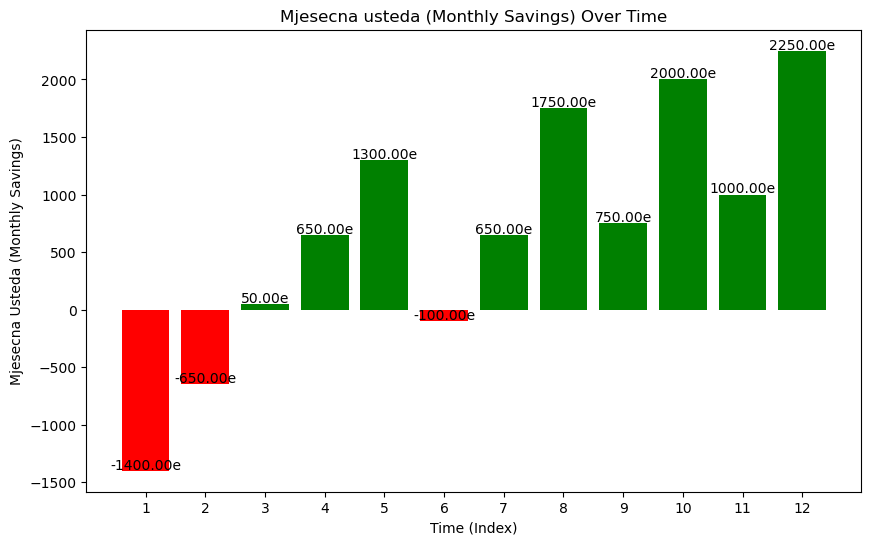

In [64]:

# Define a list to store the bar colors based on the 'mjesecna usteda' values
bar_colors = ['red' if value < 0 else 'green' for value in usporedba_troskova_df['mjesecna usteda']]

# Create a bar chart with conditional coloring
plt.figure(figsize=(10, 6))
bars = plt.bar(usporedba_troskova_df.index, usporedba_troskova_df['mjesecna usteda'], color=bar_colors)

# Labeling the chart
plt.title('Mjesecna usteda (Monthly Savings) Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Mjesecna Usteda (Monthly Savings)')
plt.xticks(usporedba_troskova_df.index)  # Show all x-axis ticks for each index

# Annotate each bar with its value
for bar in bars:
    # Get the height of the bar (the value of 'mjesecna usteda')
    height = bar.get_height()
    # Annotate the bar with the value, placing the label slightly below the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + (50),  # Positioning the label below the bar
             f'{height:.2f}e', ha='center', va='center', fontsize=10, color='black')

# Display the chart
plt.show()



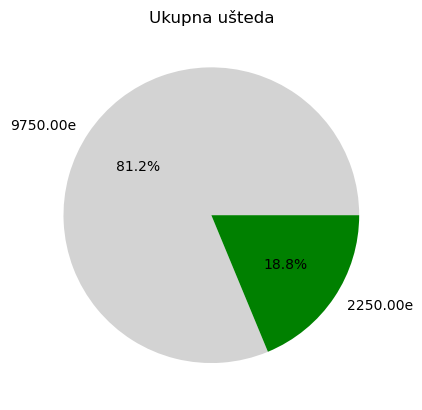

In [63]:

# Data
pie = [optimalni_troskovi[-1], cost_saving[-1]]

# Define colors: let's assume optimalni_troskovi is the first value and cost_saving is the second
colors = ['lightgray', 'green']

# Define Title
plt.title('Ukupna ušteda')

# Plot the pie chart
plt.pie(pie, labels=[f"{x:.2f}e" for x in pie], autopct='%1.1f%%', colors=colors)

# Display the chart
plt.show()
